In [9]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT, ZGate
import numpy as np

Grovers Algorithm
Searching algorithm
1)Rotate |s> by theta in clockwise direction by Us oracle
2)anti clockwise rotaion by UfUs|s> oracle
Increase Probability of finding the element
number of iterations =(pi/4)*sqrt(N/M)
A three qubit implementation

In [5]:
qr = QuantumRegister(3) 
cr=ClassicalRegister(3)
circuit = QuantumCircuit(qr,cr)

In [6]:
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.barrier()

Negate your solution element

In [8]:
#Define what you want
numqubits=3
solutions=["101","100"]
M=len(solutions)#number of solution
n=int(3.14*np.sqrt(2**numqubits/M))//4
print("The number of iterations are:"+" "+str(n))

The number of iterations are: 1


step1:Hadamard transform on all qubits
step2:Apply an X gate on all qubits
step3:Apply a multi-controlled Z gate (which flips the sign of the state only if all qubits are in the state |1>)
Step4:Apply an X gate on all qubits
step 5:Hadamard transform on all qubits

In [11]:
for i in range(n):#we need to iterate till convergence
    for j in solutions:#rotating in clockwise
        for k in range(len(j)):
            if j[k]=='0':
                circuit.x(qr[k])
        circuit.compose(MCMT(ZGate(),2, 1), inplace=True)
        circuit.barrier()
        for k in range(len(j)):
            if j[k]=='0':
                circuit.x(qr[k])
    #grovers oracle            
    circuit.h(qr) 
    circuit.x(qr)        
    circuit.h(2)        
    circuit.mcx([0,1],2)
    circuit.h(2)
    circuit.x(qr) 
    circuit.h(qr)
    circuit.barrier()            


In [12]:
circuit.measure_all()

In [13]:
circuit.draw()

┌───┐ ░          ░               ░ ┌───┐┌───┐               ┌───┐┌───┐»
  q0_0: ┤ H ├─░───────■──░────────────■──░─┤ H ├┤ X ├────────────■──┤ X ├┤ H ├»
        ├───┤ ░ ┌───┐ │  ░ ┌───┐┌───┐ │  ░ ├───┤├───┤┌───┐       │  ├───┤├───┤»
  q0_1: ┤ H ├─░─┤ X ├─■──░─┤ X ├┤ X ├─■──░─┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├»
        ├───┤ ░ └───┘ │  ░ ├───┤└───┘ │  ░ ├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤»
  q0_2: ┤ H ├─░───────■──░─┤ X ├──────■──░─┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
        └───┘ ░          ░ └───┘         ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘»
  c0: 3/══════════════════════════════════════════════════════════════════════»
                                                                              »
meas: 3/══════════════════════════════════════════════════════════════════════»
                                                                              »
«              ░  ░ ┌─┐      
«  q0_0: ──────░──░─┤M├──────
«              ░  ░ └╥┘┌─┐   
«  q0_1: ──────░──░──╫─┤M├───
«        ┌───┐ ░  ░  ║ └╥┘┌─┐
«  q0_2: ┤ H ├─░──░──╫──╫─┤M├
«        └───┘ ░  ░  ║  ║ └╥┘
«  c0: 3/════════════╬══╬══╬═
«                    ║  ║  ║ 
«meas: 3/════════════╩══╩══╩═
«                    0  1  2

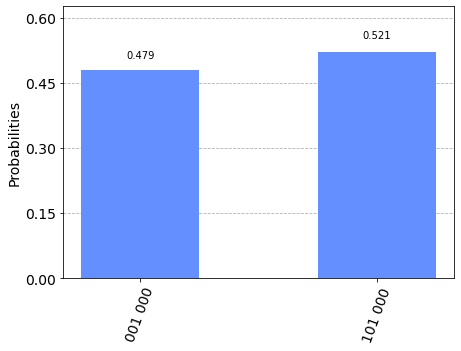

In [14]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(circuit, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)
